In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (11, 7)


In [3]:
def boxplot(*args, **kwargs):
    labels = kwargs.pop('label', None)
    return sns.boxplot(*args, **kwargs)

In [133]:
payment_features = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 
                    'deferral_payments', 'loan_advances', 'other', 'expenses', 
                   'director_fees', 'total_payments']

stock_features = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred', 'total_stock_value']

email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person', 
                   'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']

label = 'poi'

feature_names = payment_features + stock_features + email_features
feature_names.remove('email_address')

data = pd.read_csv('enron_employees.csv', na_values='NaN')

In [5]:
poi_count = len(data[data.poi == True])
non_poi_count = len(data[data.poi == False])

print("Number of POIs:\t\t%d" % poi_count)
print("Number of non-POIs:\t%d" % non_poi_count)
print("Total number:\t\t%d" % (poi_count + non_poi_count))
print("Majority class ratio:\t%f" % (float(non_poi_count) / (poi_count + non_poi_count)))


Number of POIs:		18
Number of non-POIs:	127
Total number:		145
Majority class ratio:	0.875862


In [6]:
def plot_data_presence_map(data):
    data_presence = np.logical_not(np.isnan(data.as_matrix(feature_names))).T.astype(float)
    poi_marker = data.poi.as_matrix().astype(float) + 1
    data_presence = data_presence * poi_marker
    
    plt.figure(figsize=(15, 4))
    g = plt.pcolormesh(data_presence, cmap='PuBu')
    plt.xlim(0, data_presence.shape[1])
    plt.ylim(0, data_presence.shape[0])
    plt.colorbar()

    g.axes.set_yticks(np.arange(len(feature_names)) + 0.5)
    g.axes.set_yticklabels(feature_names);

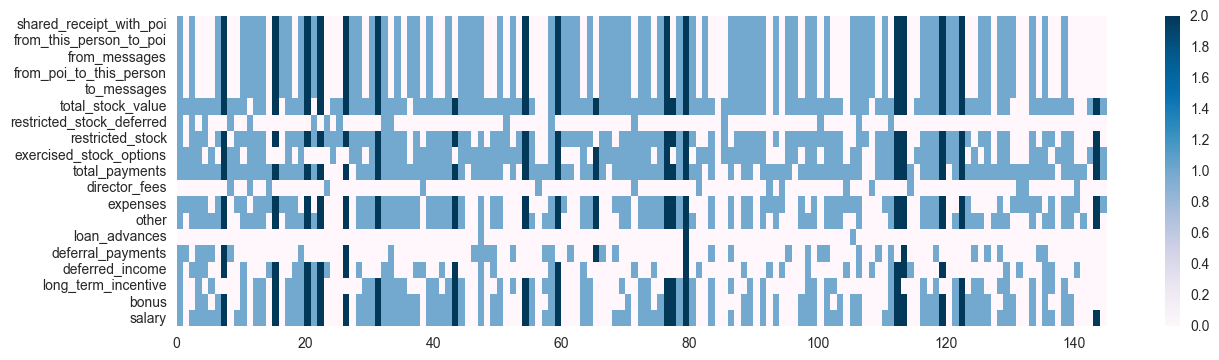

In [7]:
plot_data_presence_map(data)

In [21]:
iqr = 308606.50 - 211802.00

In [23]:
_if = iqr * 1.5

In [24]:
211802.00 - _if

66595.25

In [26]:
308606.50 + _if

453813.25

In [134]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
salary,94.0,2.840875e+05,1.771311e+05,477.0,211802.00,258741.0,308606.50,1111258.0
to_messages,86.0,2.073860e+03,2.582701e+03,57.0,541.25,1211.0,2634.75,15149.0
deferral_payments,38.0,8.416025e+05,1.289323e+06,-102500.0,79644.50,221063.5,867211.25,6426990.0
total_payments,124.0,2.623421e+06,9.488106e+06,148.0,386380.25,1100246.5,2084662.75,103559793.0
exercised_stock_options,101.0,2.959559e+06,5.499450e+06,3285.0,506765.00,1297049.0,2542813.00,34348384.0
bonus,81.0,1.201773e+06,1.441679e+06,70000.0,425000.00,750000.0,1200000.00,8000000.0
restricted_stock,109.0,1.147424e+06,2.249770e+06,-2604490.0,252055.00,441096.0,985032.00,14761694.0
shared_receipt_with_poi,86.0,1.176465e+03,1.178318e+03,2.0,249.75,740.5,1888.25,5521.0
restricted_stock_deferred,17.0,6.218928e+05,3.845528e+06,-1787380.0,-329825.00,-140264.0,-72419.00,15456290.0
total_stock_value,125.0,3.352073e+06,6.532883e+06,-44093.0,494136.00,1095040.0,2606763.00,49110078.0


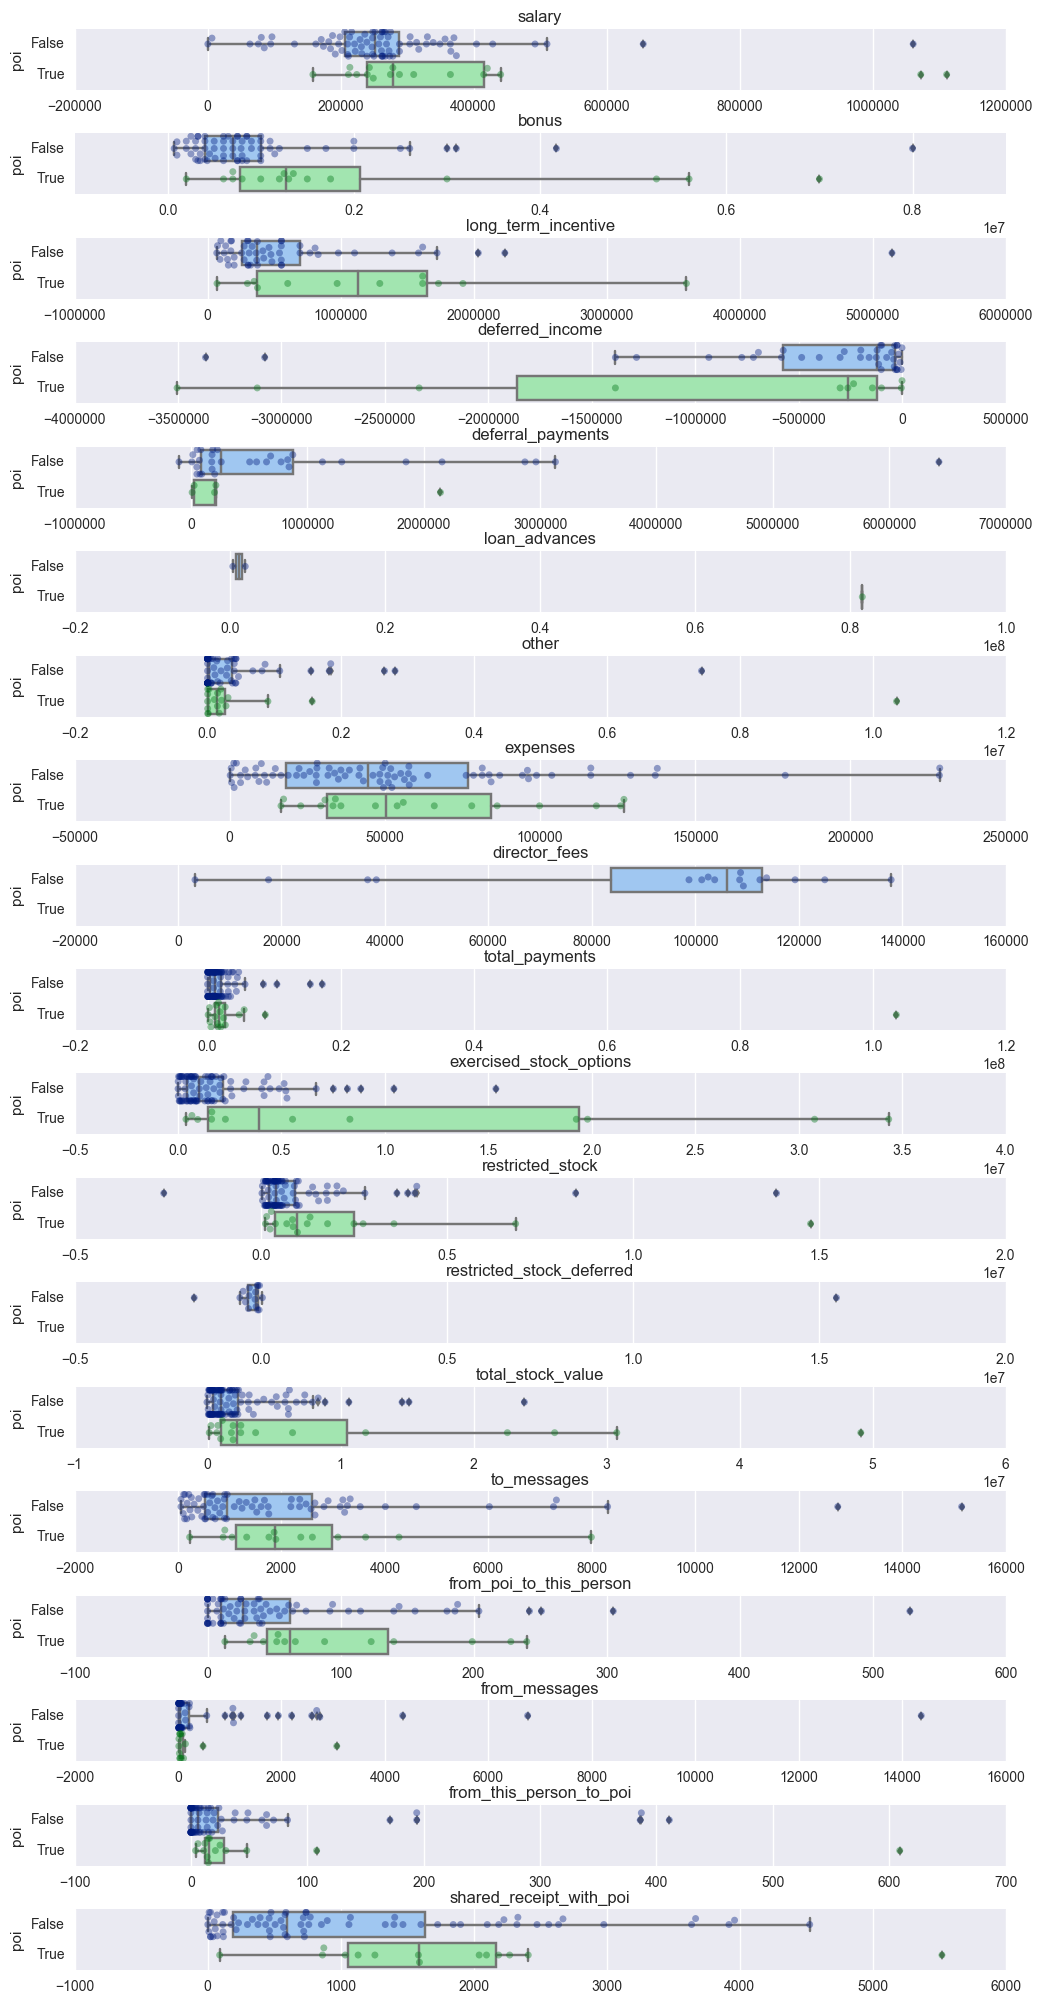

In [62]:
f, xarr = plt.subplots(len(feature_names), figsize=(10, 20))
f.tight_layout()
for i, feature in enumerate(feature_names):
    ax = xarr[i]
    sns.boxplot(data=data, x=feature, y=label, ax=ax, orient='h', whis=3, palette='pastel')
    sns.swarmplot(data=data, x=feature, y=label, ax=ax, orient='h', palette='dark', alpha=0.4)
    ax.set_xlabel("")
    ax.set_title(feature)



In [240]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy='median')
imputed_features = imputer.fit_transform(data[feature_names])

In [266]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [242]:
labels = data[label].as_matrix().astype(int)

In [267]:
ros = SMOTE(kind='svm')
X_res, y_res = ros.fit_sample(imputed_features, labels)

In [275]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.1)


clf = DecisionTreeClassifier()
cv = StratifiedKFold(n_splits=10)
scores = cross_val_score(clf, imputed_features, labels, scoring='f1', cv=cv)
clf.fit(X_train, y_train)

C:\Users\moshse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\moshse\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [276]:
print("Avg score: %0.3f" % scores.mean())
print("Score std: %0.3f" % (scores.std() * 2))

Avg score: 0.222
Score std: 0.484


In [270]:
from sklearn.metrics import f1_score

In [271]:
f1_score(y_test, clf.predict(X_test))

0.70588235294117641

In [273]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, clf.predict(X_test))

array([[10,  4],
       [ 1,  6]])

In [274]:
y_test

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0])